In [3]:
import warnings
warnings.warn("ignore")

/var/folders/c0/83yx0xpx6y39p9rt9s83rg5r0000gn/T/ipykernel_51596/3007973304.py:2: UserWarning: ignore
  warnings.warn("ignore")


Create dataset from filtered_paranmt.zip

In [5]:
from src.data.make_dataset import *
dataset = create_dataframe("data/raw/filtered_paranmt.zip")

In [6]:
dataset.shape

(577777, 7)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577777 entries, 0 to 577776
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   577777 non-null  int64  
 1   reference    577777 non-null  object 
 2   translation  577777 non-null  object 
 3   similarity   577777 non-null  float64
 4   lenght_diff  577777 non-null  float64
 5   ref_tox      577777 non-null  float64
 6   trn_tox      577777 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 30.9+ MB


In [8]:
dataset.describe()

,Unnamed: 0,similarity,lenght_diff,ref_tox,trn_tox
count,577777.000000,577777.000000,577777.000000,577777.000000,577777.000000
mean,288888.000000,0.758469,0.157652,0.541372,0.434490
std,166789.997578,0.092695,0.108057,0.457571,0.458904
min,0.000000,0.600001,0.000000,0.000033,0.000033
25%,144444.000000,0.681105,0.066667,0.012171,0.000707
50%,288888.000000,0.754439,0.141791,0.806795,0.085133
75%,433332.000000,0.831244,0.238095,0.990469,0.973739
max,577776.000000,0.950000,0.400000,0.999724,0.999730


In [9]:
dataset.head(n=10)

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348
5,5,I'm not gonna have a child... ...with the same...,I'm not going to breed kids with a genetic dis...,0.703185,0.206522,0.950956,0.035846
6,6,"They're all laughing at us, so we'll kick your...",they're laughing at us. We'll show you.,0.618866,0.230769,0.999492,0.000131
7,7,Maine was very short on black people back then.,there wasn't much black in Maine then.,0.720482,0.187500,0.963680,0.148710
8,8,"Briggs, what the hell's happening?","Briggs, what the hell is going on?",0.920373,0.000000,0.159096,0.841071
9,9,"Another one simply had no clue what to do, so ...","another simply didn't know what to do, so when...",0.877540,0.101695,0.055371,0.930472


In [10]:
dataset = create_new_columns(dataset)

In [11]:
dataset.head(n=10)

,Unnamed: 0,toxic,nontoxic,toxic_tox,nontoxic_tox
0,0,"if Alkar floods her with her mental waste, it ...","If Alkar is flooding her with psychic waste, t...",0.981983,0.014195
1,1,you're becoming disgusting.,Now you're getting nasty.,0.999039,0.065473
2,2,"well, we can spare your life.","Well, we could spare your life, for one.",0.985068,0.213313
3,3,"monkey, you have to wake up.","Ah! Monkey, you've got to snap out of it.",0.994215,0.053362
4,4,I have orders to kill her.,I've got orders to put her down.,0.999348,0.009402
5,5,I'm not gonna have a child... ...with the same...,I'm not going to breed kids with a genetic dis...,0.950956,0.035846
6,6,"They're all laughing at us, so we'll kick your...",they're laughing at us. We'll show you.,0.999492,0.000131
7,7,Maine was very short on black people back then.,there wasn't much black in Maine then.,0.963680,0.148710
8,8,"Briggs, what the hell is going on?","Briggs, what the hell's happening?",0.841071,0.159096
9,9,"another simply didn't know what to do, so when...","Another one simply had no clue what to do, so ...",0.930472,0.055371


In [12]:
dataset.describe()

,Unnamed: 0,toxic_tox,nontoxic_tox
count,577777.000000,577777.000000,577777.000000
mean,288888.000000,0.940260,0.035601
std,166789.997578,0.100831,0.079399
min,0.000000,0.500139,0.000033
25%,144444.000000,0.940145,0.000164
50%,288888.000000,0.983842,0.003456
75%,433332.000000,0.997519,0.027242
max,577776.000000,0.999730,0.499494


In [13]:
print("toxic sentences > 0.75 of toxic_tox:", len(dataset[dataset['toxic_tox'] > 0.75]) / len(dataset['toxic_tox']))

toxic sentences > 0.75 of toxic_tox: 0.9243254750535241


In [14]:
print("detoxed sentences < 0.25 of nontoxic_tox:", len(dataset[dataset['nontoxic_tox'] < 0.25]) / len(dataset['nontoxic_tox']))

detoxed sentences < 0.25 of nontoxic_tox: 0.959344176040237


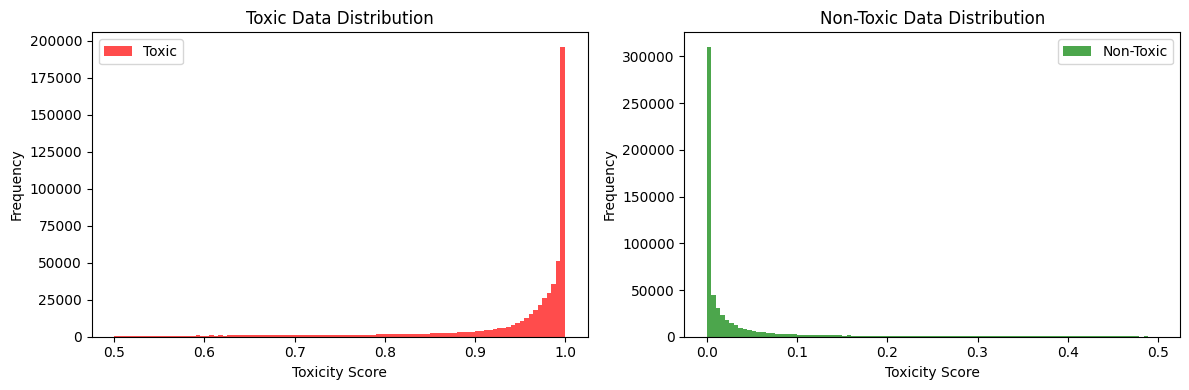

In [23]:
import matplotlib.pyplot as plt

# Extract data from the dataset
toxic_tox_data = dataset['toxic_tox'].tolist()
nontoxic_tox_data = dataset['nontoxic_tox'].tolist()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(toxic_tox_data, bins=100, color='red', alpha=0.7, label='Toxic')
ax2.hist(nontoxic_tox_data, bins=100, color='green', alpha=0.7, label='Non-Toxic')

ax1.set_title('Toxic Data Distribution')
ax2.set_title('Non-Toxic Data Distribution')
ax1.set_xlabel('Toxicity Score')
ax2.set_xlabel('Toxicity Score')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('Frequency')

# add a legend to differentiate between toxic and non-toxic data
ax1.legend()
ax2.legend()

# customize the appearance and layout
plt.tight_layout()

plt.show()


I decided to delete about 15% of unuseful or even harmful data.

In [24]:
dataset = remove_unuseful_data(dataset)

In [25]:
dataset.shape

(510564, 5)

In [26]:
dataset

,Unnamed: 0,toxic,nontoxic,toxic_tox,nontoxic_tox
0,0,"if Alkar floods her with her mental waste, it ...","If Alkar is flooding her with psychic waste, t...",0.981983,0.014195
1,1,you're becoming disgusting.,Now you're getting nasty.,0.999039,0.065473
2,2,"well, we can spare your life.","Well, we could spare your life, for one.",0.985068,0.213313
3,3,"monkey, you have to wake up.","Ah! Monkey, you've got to snap out of it.",0.994215,0.053362
4,4,I have orders to kill her.,I've got orders to put her down.,0.999348,0.009402
...,...,...,...,...,...
577772,577772,you didn't know that Estelle stole your fish f...,You didn't know that Estelle had stolen some f...,0.949143,0.000121
577773,577773,It'il suck the life out of you!,you'd be sucked out of your life!,0.996124,0.215794
577774,577774,"I can't fuckin' take that, bruv.",I really can't take this.,0.984538,0.000049
577775,577775,They called me a fucking hero. The truth is I ...,"they said I was a hero, but I didn't care.",0.991945,0.000124


In [27]:
toxic, nontoxic = get_sentences(dataset)

In [28]:
toxic[:10]

['if Alkar floods her with her mental waste, it would explain the high levels of neurotransmitter.',
 "you're becoming disgusting.",
 'well, we can spare your life.',
 'monkey, you have to wake up.',
 'I have orders to kill her.',
 "I'm not gonna have a child... ...with the same genetic disorder as me who's gonna die. L...",
 "They're all laughing at us, so we'll kick your ass.",
 'Maine was very short on black people back then.',
 'Briggs, what the hell is going on?',
 "another simply didn't know what to do, so whenever he met my brother, he nearly beat the shit out of him."]

In [29]:
nontoxic[:10]

['If Alkar is flooding her with psychic waste, that explains the high level of neurotransmitters.',
 "Now you're getting nasty.",
 'Well, we could spare your life, for one.',
 "Ah! Monkey, you've got to snap out of it.",
 "I've got orders to put her down.",
 "I'm not going to breed kids with a genetic disorder that makes them die.",
 "they're laughing at us. We'll show you.",
 "there wasn't much black in Maine then.",
 "Briggs, what the hell's happening?",
 "Another one simply had no clue what to do, so whenever he met my brother he'd beat the crap out of him, and then say:"]

In [21]:
split_train_test(toxic, nontoxic, path='../data/interim')